### <p style="text-align: right;"> &#9989; Andrew Koren</p>

# PHY480 Day 14

## In-class assignment: Root finding and optimization revisited

In this in-class assignment we generalize the root finding and optimization methods for multivariate case. This requires linear algebra operations.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import *


## Newton-Raphson root finding

**Task 1.** Consider the following system of equations:

$$
x^2+y^2=1,
$$

$$
y=x^2.
$$

Rewrite the system in the form 

$$
\vec{f}(\vec{r})=0,
$$

where $\vec{r}=(x,y)$. Write two functions that return $\vec{f}$ and the matrix $\vec{\nabla}\vec{f}$ (which is defined as transposed Jacobian).

Also, find the exact (real) solution of the system for comparison.


In [6]:
# YOUR CODE HERE
def f(r):
    x, y = r
    return np.array([x**2 + y**2 - 1, y - x**2])

def grad_f(r):
    x, y = r
    return np.array([[2*x, -2*x], [2*y, 1]])

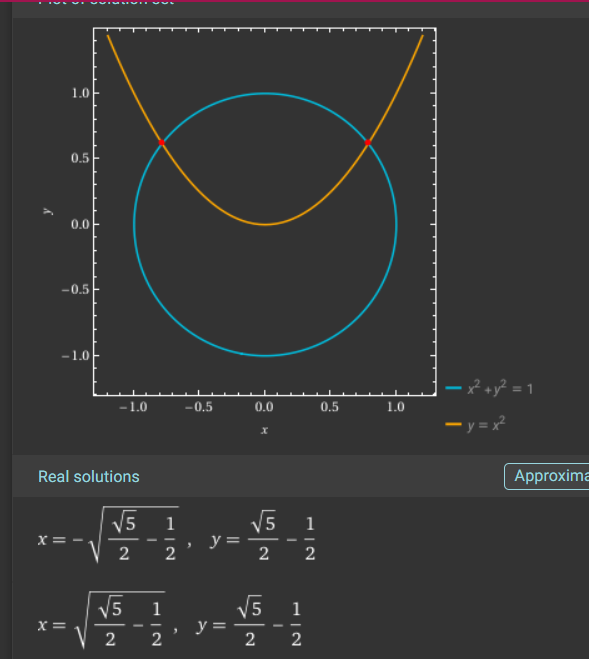

**Task 2.** Program a multi-dimensional Newton-Raphson root finding method. This is a simple extension of the one-dimensional method that we considered earlier. Use your own or NumPy functions for the Jacobian inversion.


In [ ]:
# Newton-Raphson root finding method
# Input:
# x0 -- starting point
# fun -- function f(x)
# dfun -- derivative f'(x)
# tol -- tolerance, the search stops once |f(x)| is less than the tolerance
# max_iter -- maximum number of iterations
# Output:
# status -- =0, if the search was successful
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates

def root_newton_raphson(x0, fun, dfun=None,  tol=1e-4, max_iter=100 ):
    xn = [x0]
    i = 0
    status = 1

    if dfun==None:
        # Jinv = ...
        raise NotImplementedError('Autojacobian not implemented')
    else:
        # I think we use J^-1 = (∇f.T)^-1
        Jinv = lambda r: np.linalg.inv(dfun(r).T+0.0001) #prevents singular

    while np.linalg.norm(fun(xn[-1])) > tol or i == max_iter:
        if np.linalg.norm(dfun(xn[-1])) == 0:
            i = max_iter
            break
        if i == max_iter:
            break
        xn1 = xn[-1] - Jinv(xn[-1])@fun(xn[-1])
        xn.append(xn1)
        i += 1
    
    if i != max_iter:
        status = 0

    return status, xn[-1], i, xn

**Task 3.** Solve the two-by-two nonlinear system you programmed in the previous exercise with the Newton-Raphson method. Use several starting points to see how the root finding method performs: $(0,0)$, $(0,1)$, $(0.1,0.1)$. Experiment with the tolerance. Compare with the exact solution.


In [439]:
status, result, steps, xn = root_newton_raphson((0,0), f, grad_f)
print(result, steps, status)

status, result, steps, xn = root_newton_raphson((0,0), f, grad_f, max_iter=int(1e5))
print(result, steps, status)
print(f(result))


status, result, steps, xn = root_newton_raphson((0,0), f, grad_f, tol=1e-14, max_iter=int(1e5))
print(result, steps)
print(f(result)) #converges very quickly near the end, only 2 steps

status, result, steps, xn = root_newton_raphson((0,1), f, grad_f, max_iter=int(1e5))
print(result, steps) # much faster convergence!

status, result, steps, xn = root_newton_raphson((0.1,0.1), f, grad_f, max_iter=int(1e5))
print(result, steps) # much faster convergence!!



[-1.63635103 -1.61784863] 100 1
[0.7861516  0.61803404] 9139 0
[ 4.10118692e-07 -2.91147723e-07]
[0.78615138 0.61803399] 9141
[1.99840144e-15 2.33146835e-15]
[-0.78615138  0.61803398] 19
[0.78616157 0.61803435] 6


## Newton-Raphson optimization

**Task 4.** Program the Newton-Raphson method as an optimization method. In its basic form it requires the gradient and the Hessian for a (scalar) function $f(\vec{x})$, but not the function itself. However, modifications of this method may also require the function, so it is a good idea to program the method that receives in the arguments the function, its gradient and the Hessian. Use the `is_verbose` flag to print the norm of the gradient on every tenth iteration, if `True`.


In [652]:
# Newton-Raphson optimization method
# Input:
# fun -- scalar function f(x) of a vector argument x
# dfun -- the gradient of f
# ddfun -- the Hessian of f
# x0 -- starting point (as NumPy vector of proper dimension)
# tol -- tolerance, the search stops once ||grad f(x)|| is less than the tolerance
# max_iter -- maximum number of iterations
# is_verbose -- print ||grad f(x)|| on every tenth iteration if True
# Output:
# status -- =0, if the search was successful, =1, if maximum number of iterations was exhausted
# x -- the solution (last iterate)
# k -- number of iterations it took
# xlist -- the list of all iterates
def optimize_newton_raphson( x0, fun, dfun=None, ddfun=None, tol=1e-5, max_iter=100, is_verbose=False ):
    xn = [x0]
    i = 0
    status = 1
    if dfun==None:
        # dfun = ...
        raise NotImplementedError('Autogradient not implemented')

    if ddfun==None:
        # Hinv = ...
        raise NotImplementedError('Autohessian not implemented')
    else: 
        Hinv = lambda r: np.linalg.inv(ddfun(r))

    while np.linalg.norm(fun(xn[-1])) > tol or i == max_iter:
        if np.linalg.norm(dfun(xn[-1])) == 0:
            i = max_iter
            break
        if i == max_iter:
            break
        xn1 = xn[-1] - Hinv(xn[-1])@dfun(xn[-1])
        xn.append(xn1)
        i += 1

        if is_verbose and i%10==0:
            print(xn[-1])
    
    if i != max_iter:
        status = 0

    return status, xn[-1], i, xn

**Task 5.** Consider the following four test functions. Code their gradients and Hessians.


In [723]:
# multivariate function 1
def multifun1( x_vec ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( 4*x - 4 )**2 + ( y - 2 )**2

# multivariate function 2
def multifun2( x_vec ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( 4*x - 4*y - 1 )**2 + ( x + y - 2 )**2

# multivariate function 3
def multifun3( x_vec, a=1, b=10 ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return ( a - x )**2 + b*( y - x**2 )**2

# multivariate function 4
def multifun4( x_vec, a=1.5 ):

    # unpack the argument
    x = x_vec[0]
    y = x_vec[1]

    return -np.exp( -( x*y - a )**2 - ( y - a )**2 )


In [728]:
import sympy as sp

x, y = sp.symbols('x y')


multifun1sp = ( 4*x - 4 )**2 + ( y - 2 )**2
multifun2sp = ( 4*x - 4*y - 1 )**2 + ( x + y - 2 )**2
a = 1
b = 10
multifun3sp = ( a - x )**2 + b*( y - x**2 )**2
a = 1.5
multifun4sp = -sp.exp( -( x*y - a )**2 - ( y - a )**2 )


# compute gradient, hessian

multifun = multifun4sp
g = (sp.diff(multifun, x), sp.diff(multifun, y))
h = sp.hessian(multifun, (x,y))

mf = lambda r: sp.lambdify((x,y), multifun)(r[0], r[1])
dmf = lambda r: np.array(sp.lambdify((x,y), g)(r[0], r[1]))
ddmf = lambda r: sp.lambdify((x,y), h)(r[0], r[1])

**Task 6.** Find the minimum with the Newton-Raphson method and plot contours (check the documentation for the `contour` function in `matplotlib.pyplot`) for the functions given above and the path that the optimizer takes. In some cases, the method may not converge to a local minimum. For convenience, use the parameters preset below. Here `xtrue` is the location of the minimum for comparison, and `ax,bx`, `ay,by` provide the intervals for plotting on $x$ and $y$, correspondingly. `x0_list` is the list of starting points for each test function.

For the second test function the plot may looks something like this:

![minimization](nr_case2.png)


In [716]:
# set to 1, 2, 3 or 4 to run optimization and plot
icase = 4

if icase == 1:
    xtrue = np.array( [1,2] )
    x0_list = [ np.array( [ 10, 10 ] ), np.array( [ 3, 10 ] ), np.array( [ 10, 0 ] ), \
                np.array( [ 2, 7 ] ), np.array( [ 0, 5 ] ) ]
    ax, bx = -2, 12
    ay, by = -2, 12
elif icase == 2:
    xtrue = np.array( [1.125, 0.875] )
    x0_list = [ np.array( [ 10, 10 ] ), np.array( [ 3, 10 ] ), np.array( [ 10, 0 ] ), \
                np.array( [ 2, 7 ] ), np.array( [ 0, 5 ] ) ]
    ax, bx = -2, 12
    ay, by = -2, 12
elif icase == 3:
    xtrue = np.array( [1.0, 1.0] )
    x0_list = [ np.array( [ 0, 2 ] ), np.array( [ 1, 0 ] ), np.array( [ 1, -1 ] ), \
                np.array( [ -0.5, 2 ] ), np.array( [ -2, -1 ] ) ]
    ax, bx = -2, 2
    ay, by = -1, 3
elif icase == 4:
    xtrue = np.array( [1.0, 1.5] )
    x0_list = [ np.array( [0,1.8] ), np.array( [2,2] ), np.array( [0.5,2.5] ), np.array( [1.2,1.5] ), \
                np.array( [1.5,1.] ) ]
    ax, bx = 0, 3
    ay, by = 0, 3


[0.  1.8]
[2 2]
[0.5 2.5]
[1.2 1.5]
[1.5 1. ]


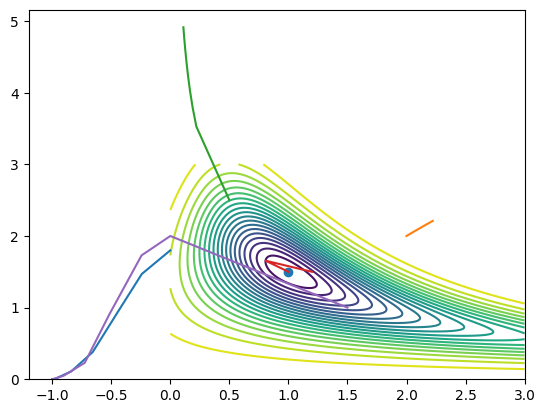

In [ ]:
xar = np.linspace(ax, bx, 1000) #x,y taken by sympy
yar = np.linspace(ay, by, 1000)
X, Y = np.meshgrid(xar,yar)

Z = multifun4((X, Y))


plt.contour(X, Y, Z, levels=20)
plt.scatter(xtrue[0], xtrue[1])

for x0 in x0_list:
    status, result, steps, step_list = optimize_newton_raphson(x0, mf, dmf, ddmf)
    path = np.array(step_list)
    plt.plot(path[:,0], path[:,1])


In [719]:
step_list

[array([1.5, 1. ]),
 array([-2.22044605e-15,  2.00000000e+00]),
 array([-0.24324324,  1.72972973]),
 array([-0.51610544,  0.90639082]),
 array([-0.72441883,  0.22988631]),
 array([-0.90355393,  0.04915543]),
 array([-0.99152848,  0.00212745]),
 array([-9.99971580e-01,  3.14925331e-06]),
 array([-1.00000000e+00,  6.61302693e-12]),
 array([-1.00000000e+00,  2.91556932e-23]),
 array([-1.,  0.]),
 array([-1.,  0.])]

In [695]:
multifun3(xtrue)

0.0

## Gradient descent

**Task 7.** Code a multivariate gradient descent optimization algorithm. Use `scipy.optimize.line_search` to find the step size (study the documentation on how to properly provide the arguments and read the step size from the returned value). Make sure to check for line search failure and return proper status.


In [ ]:
# gradient descent optimization, requires objective function and its gradient as arguments
# Input:
# fun -- objective function, callable
# dfun -- gradient of the objective function, callable
# x0 -- starting point vector
# tol -- tolerance, the search stops once ||grad f(x)|| is less than the tolerance
# Output: comma-separated list
# status -- =0, if successful, =1, if maximum number of iterations reached, =2, if line search did not converge
# minimum that was found
# number of iterations
# list of all iterates
def optimize_grad_descent( fun, dfun, x0, tol=1e-4, max_iter=100 ):
    
    return # something


**Task 8.** Find the minimum for the four test functions given above and plot what path the gradient descent method took together with the function contours.

For the second test function the plot may looks something like this:

![minimization](gd_case2.png)


&#169; Copyright 2025,  Michigan State University Board of Trustees

---

Conjugate directions method

$$
\phi(\alpha) \equiv f(\vec x_k + \alpha \vec p_k) \\
0 = \frac{d\phi}{d\alpha} \Rightarrow \alpha_k = -\frac{\vec r_k \vec p_k}{\vec p_k A \vec p_k} \\
\vec r_k = A \vec x_k - \vec b
$$

Understanding the algebra: if we fix our axis, we can get there obviously in $n$ steps.

$$
\mathcal S = (\vec p_0 \vec p_1 \dots \vec p_{n-1}) \quad \vec x = \mathcal S \vec x' \\
f(\vec x') = \frac{1}{2} \vec x' \underset{\text{diagonal}}{\mathcal S^T A \mathcal S} \vec x' - \vec b \mathcal S \vec x' + C \\
(\mathcal S^T A \mathcal S)_{ij} = \vec P_i A \vec P_j = 0,\quad i\neq j
$$

Not practical until we find the conjugate axis: use the conjugate axis
r is the deviation from the actual

$$
\beta_k = \frac{\vec r_k A \vec p_{k-1}}{\vec p_{k-1} A \vec p_{k-1}} \\
\vec r_i \vec r_j = 0 \quad i\neq j
$$
$\vec p_k, \vec r_k$ This makes the Krylov subspace of degre k for $\vec r_0$

$$
\mathcal K (\vec r_0, k) = \text{span} \left\{\vec r_0, A \vec r_0, A^2 \vec r_0, \dots, A^k \vec r_0 \right\}
$$

Remember $\vec r_0 = A \vec x_0 - \vec b$ is the error so far.